#  Predict the severity of Airplane accidents

**Overview :**

Nowadays transport of airways has been playing a key role in every industry. airlines and passengers' safety is the first concern we should take care of. Also, usage of airways for passengers and cargo is increasing rapidly, Various Safety checks are done continuously 24/7 manually, and every safety measure and precaution are been taken care of by the airline team but still some case accidents due to various reasons like pilot error, air traffic controller error, design and manufacturer defects, maintenance failures, sabotage, or inclement weather etc. They are some ways to avoid such failures.
Our motto is to reduce airline accidents as low as possible. So, we can find a way to avoid such accidents with the previous airline crash or failure data. we use this data to avoid such same cases in future. this can save lot of lives and money. automatic the severity of any aeroplane accident help gets an idea of what is happening. so that, things can be taken care. Data such as Safety Score, Days Since Inspection, Total Safety Complaints, Control Metric, Turbulence In g-forces, Cabin Temperature, Accidents Type Code, Max Elevation, Violations, Adverse Weather Metric with these data, predict the severity of the accident and accidents are classified into four types they are
1.	Minor Damage and Injuries
2.	Significant Damage and Fatalities
3.	Significant Damage and Serious Injuries
4.	 Highly Fatal and Damaging


Hacker Rank : [link](https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/problems/)

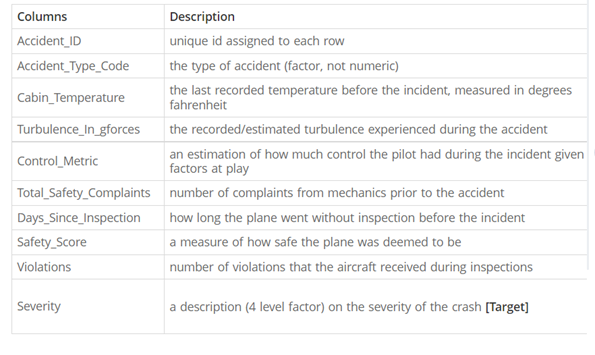

**Business constraints**
*	latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.


## importing bunch of packages and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/case study 1/data/train.csv')

df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


## data information 

In [ ]:
print(df.shape)

(10000, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


observations : 
1. total data points for train data is 1000 with 11 features and one class  
2. there are no null values in the whole data set, we can proceed further without data cleaning 

## EDA

### class feature

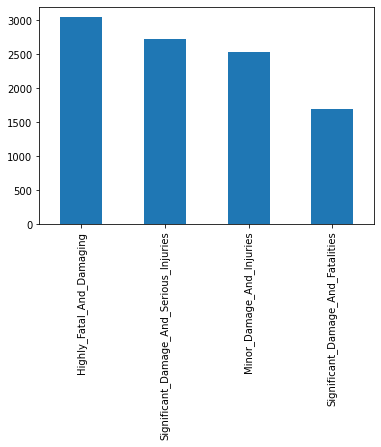

In [ ]:
df['Severity'].value_counts(sort=True).plot(kind='bar')

In [ ]:
df['Severity'].value_counts(sort=True)

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [ ]:
print("Highly_Fatal_And_Damaging :",round((3049/10000)*100),"%")
print("Significant_Damage_And_Serious_Injuries :",round((2729/10000)*100),"%")
print("Minor_Damage_And_Injuries  :",round((2527/10000)*100),"%")
print("Significant_Damage_And_Fatalities :",round((1695/10000)*100),"%")

Highly_Fatal_And_Damaging : 30 %
Significant_Damage_And_Serious_Injuries : 27 %
Minor_Damage_And_Injuries  : 25 %
Significant_Damage_And_Fatalities : 17 %


observation :
1. We found that Significant_Damage_And_Fatalities is minor class among all the others class
2. Highly_Fatal_And_Damaging is the max class have more data points

Dropping **Accident_ID**

In [ ]:
df = df.drop(['Accident_ID'],axis=1)
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


### input features 

#### Bar chart

In [ ]:
def cat_bar_chat(df,col):
  lst1=sorted((((pd.to_numeric(df[col])).unique()).tolist()))
  lst2 = ['Highly_Fatal_And_Damaging','Significant_Damage_And_Serious_Injuries','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities']
  df1=pd.DataFrame()
  df1[col]=lst1
  for i in lst2:
    A=(df[col].loc[df['Severity'] == i]).value_counts()
    new1=[]
    for j in lst1:
      new1.append(A[j])
    df1[i]=new1

  df1.plot(x=col,
        kind='bar',
        stacked=False,
        title= col+' vs Severity',
        ylim = (0,2000))  

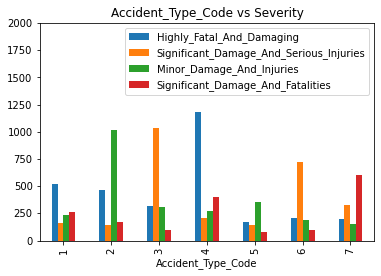

In [ ]:
cat_bar_chat(df,'Accident_Type_Code')  

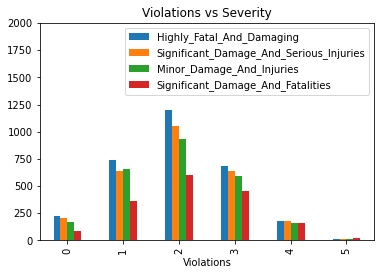

In [ ]:
cat_bar_chat(df,'Violations')  

observation :
1. we can see clearly that accident_type_code 4 is lead to high fatal and damaging, similarly type 2 is minor damages, type 3 is Significant Damage And Serious Injuries, look  like accident type can help us 
2. whereas no of violation are looking same for each class and there is very less data which have 5 violations these result Significant Damage And Fatalities

#### Pdf's 

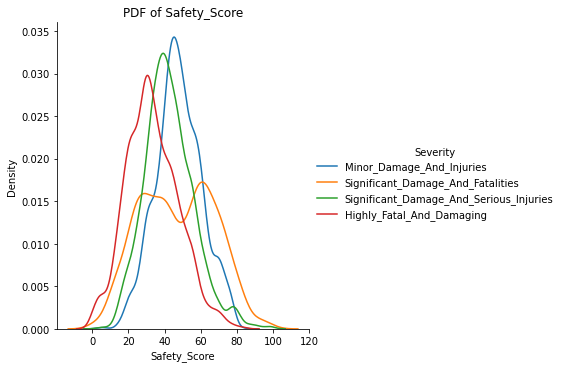

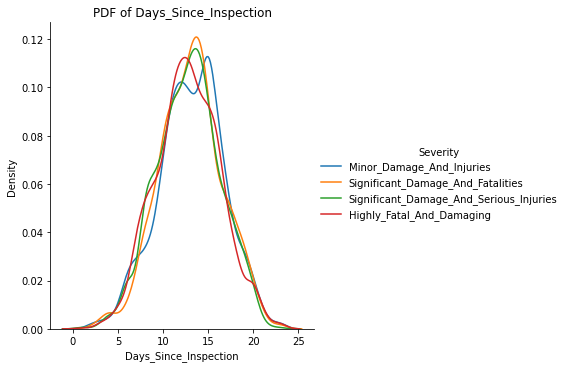

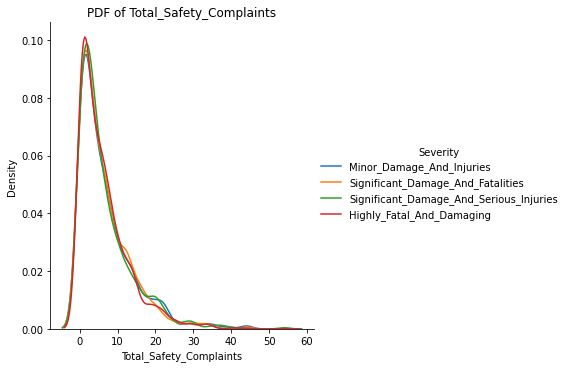

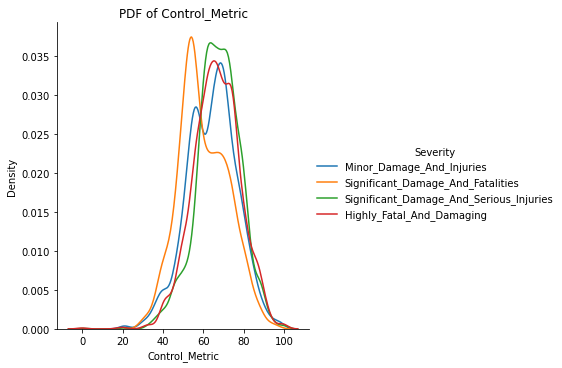

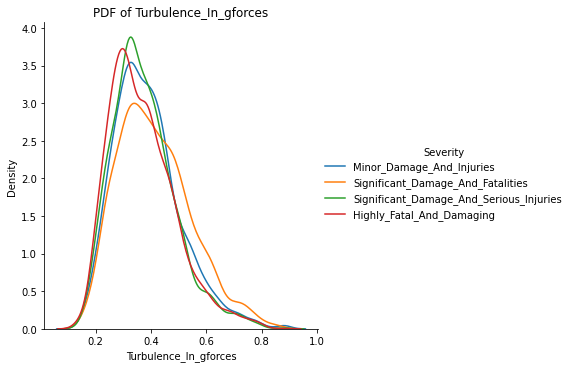

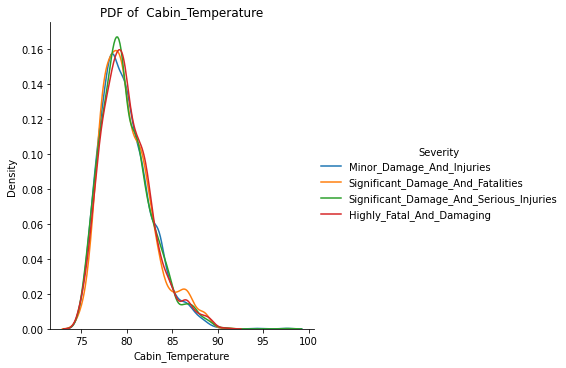

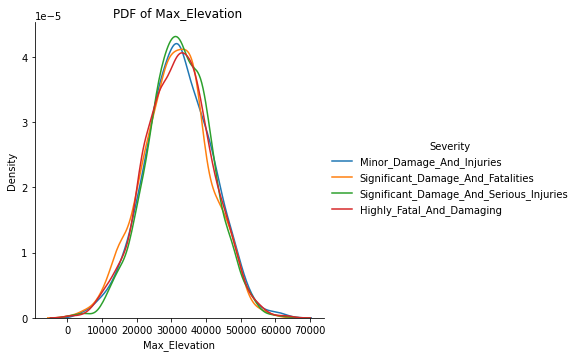

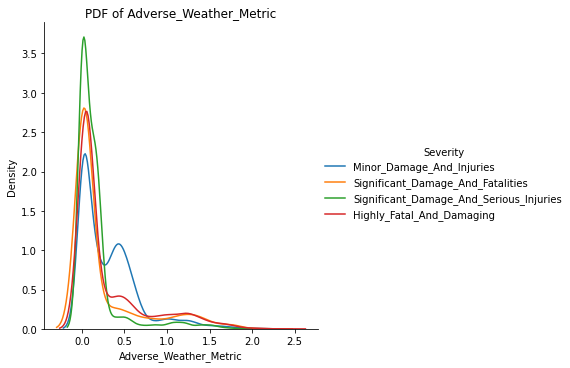

In [ ]:
g = sns.FacetGrid(df, hue="Severity", height=5)
g.map(sns.kdeplot, "Safety_Score").add_legend()
plt.title("PDF of Safety_Score")
plt.show()

h = sns.FacetGrid(df, hue="Severity", height=5)
h.map(sns.kdeplot, "Days_Since_Inspection").add_legend()
plt.title("PDF of Days_Since_Inspection")
plt.show()

I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Total_Safety_Complaints").add_legend()
plt.title("PDF of Total_Safety_Complaints")
plt.show()

I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Control_Metric").add_legend()
plt.title("PDF of Control_Metric")
plt.show()

I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Turbulence_In_gforces").add_legend()
plt.title("PDF of Turbulence_In_gforces")
plt.show()

I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Cabin_Temperature").add_legend()
plt.title("PDF of  Cabin_Temperature")
plt.show()


I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Max_Elevation").add_legend()
plt.title("PDF of Max_Elevation ")
plt.show()


I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Adverse_Weather_Metric").add_legend()
plt.title("PDF of Adverse_Weather_Metric")
plt.show()






observation :
1. safety score look good when compare to the others pdf's, safety score might be an important feature
2. we can observed that the 10-15 Days_Since_Inspection has more incidents 
3. all other pdf are completely overlapping to each other, now lets try with scatter plot with two features

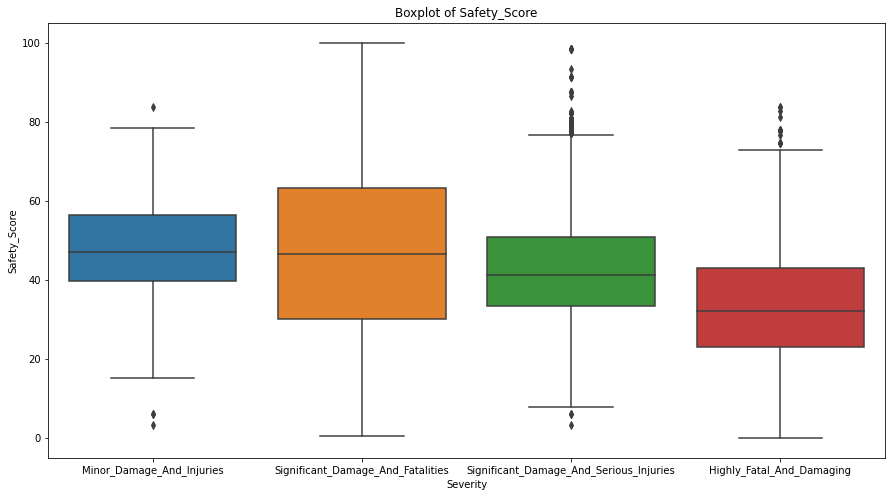

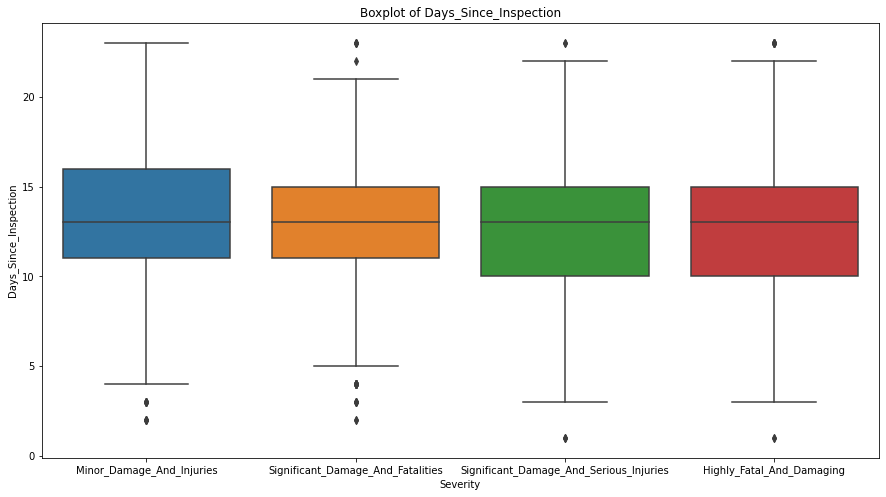

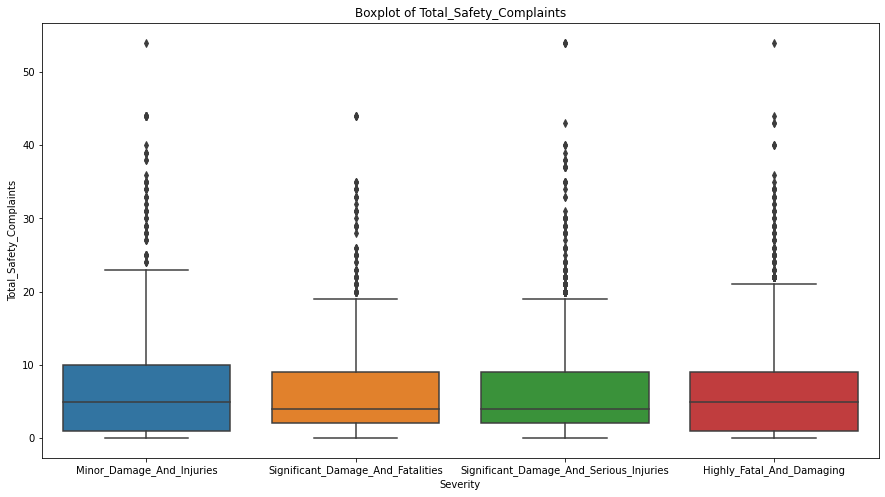

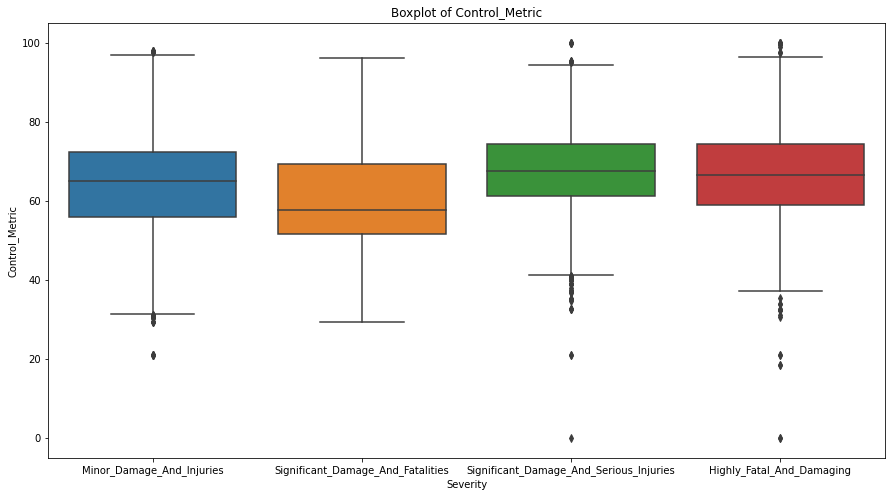

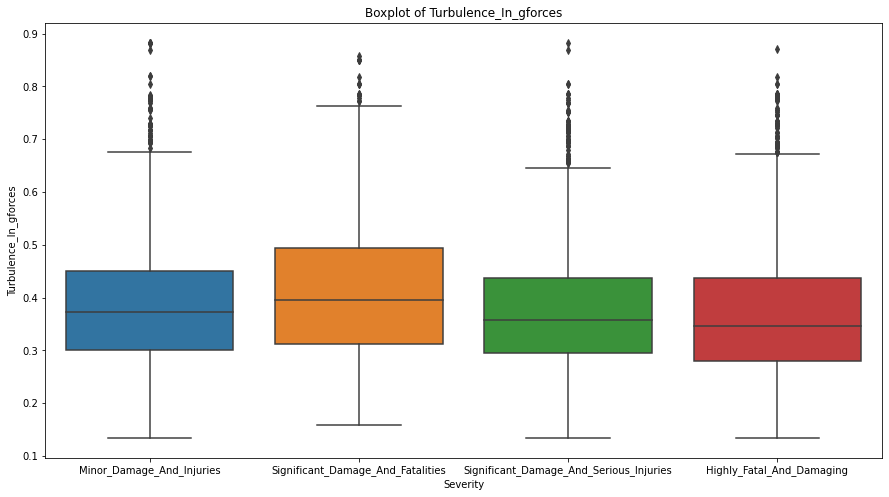

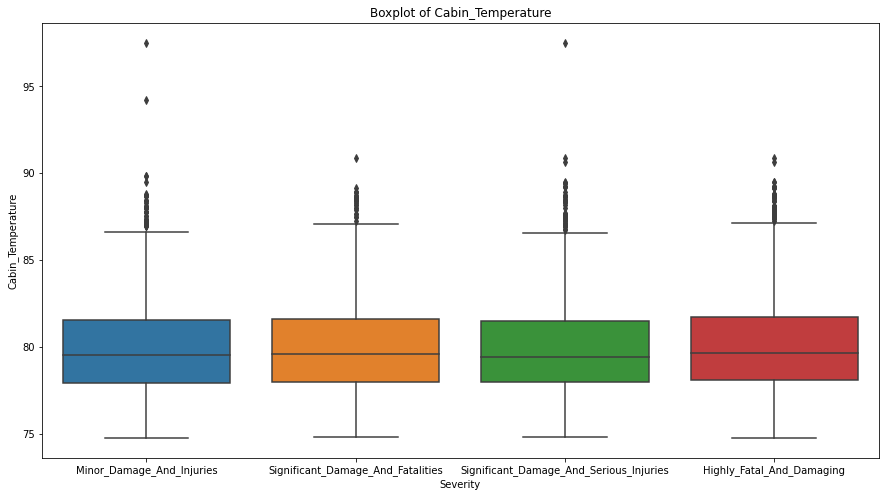

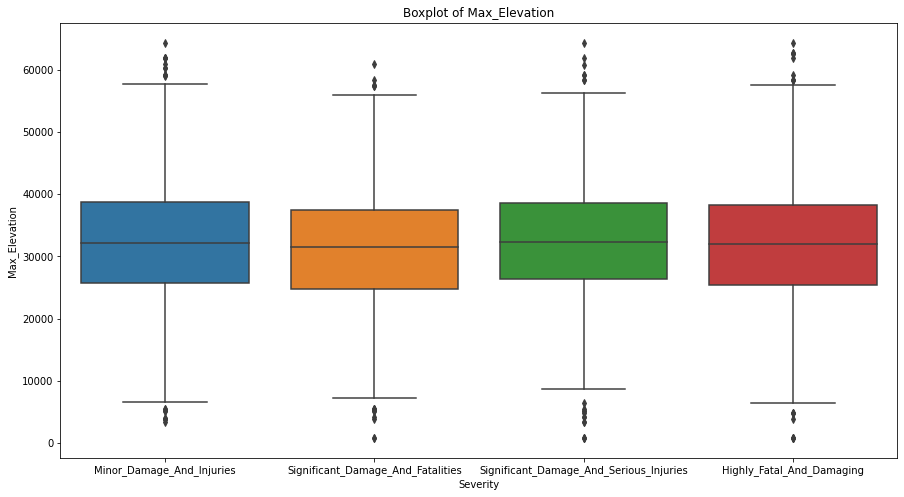

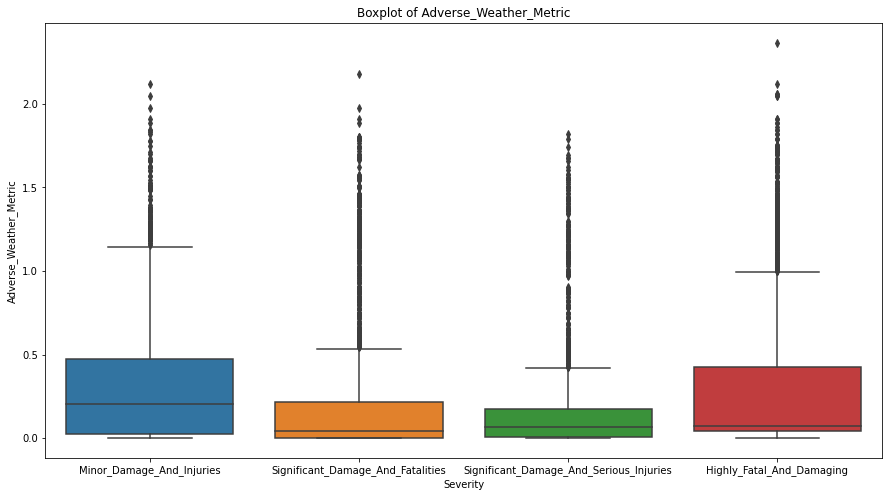

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Safety_Score', data=df)
plt.title("Boxplot of Safety_Score")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Days_Since_Inspection', data=df)
plt.title("Boxplot of Days_Since_Inspection")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Total_Safety_Complaints', data=df)
plt.title("Boxplot of Total_Safety_Complaints")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Control_Metric', data=df)
plt.title("Boxplot of Control_Metric")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Turbulence_In_gforces', data=df)
plt.title("Boxplot of Turbulence_In_gforces")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Cabin_Temperature', data=df)
plt.title("Boxplot of Cabin_Temperature")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Max_Elevation', data=df)
plt.title("Boxplot of Max_Elevation")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(x='Severity',y='Adverse_Weather_Metric', data=df)
plt.title("Boxplot of Adverse_Weather_Metric")
plt.show()

observation :
1.  For most of the box plots the 50th percentail is almost same but saftey score box plot slight better 
2. In Adverse_Weather_Metric and Total_Safety_Complaints classes are postive skewed 

#### **Outliers :**  Using Zscore 
blog : https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Safety_Score"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  29


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Days_Since_Inspection"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  13


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Total_Safety_Complaints"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  196


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Control_Metric"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  20


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Turbulence_In_gforces"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  96


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Cabin_Temperature"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  93


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Max_Elevation"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  27


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df["Adverse_Weather_Metric"])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  254


1. Safety_Score: has only a few outliers
2. Days_Since_Inspection: has only a few outliers 
3. Total_Safety_Complaints: has a more outliers
4. Control_Metric: has outliers a few outliers
5. Turbulence_In_gforce: has not low not high outliers
6. Cabin_Temperature: has not low not high outliers
6. Max_Elevation: had few outliers in all classes 
7. Adverse_Weather_Metric: have more outliers
8. In Adverse_Weather_Metric and Total_Safety_Complaints classes are postive skewed so these features has high outliers


#### scatter plots -2D

In [ ]:
plt.close();
sns.set_style("whitegrid");

sns.pairplot(df, hue="Severity",palette=["r","b","g","y"],height=3);
plt.show()

observations : 
1. In safety score vs days_since_inspection looking good and easy to seprate , we can try some feature engineering methods on these features.
2. In accident_type_code vs adverser_weather_metric, we can pont yellow and grren point are grouped and orange and blue are grouped.
3. IN safety score vs rest , we are able to seprate atleat two class yellow and blue roughly 
4. we aslo find an intresting plot accident_type vs volations 
5. seem to be there only 4-5 feature looking good throught the features 
6. let's try in dim reduction plot, let's see if there is any luck

#### T-SNE 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 34.093405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.476379
[t-SNE] KL divergence after 1000 iterations: 0.388491


[(-150.0, 150.0), (-150.0, 150.0), Text(0.5, 1.0, 'T-SNE projection')]

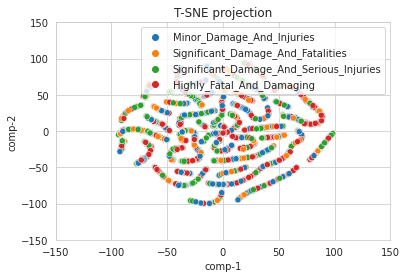

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
df_temp = df.drop(['Severity'], axis=1 )
z = tsne.fit_transform(df_temp)
df1 = pd.DataFrame()
df1["y"] = df['Severity']
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                data=df1).set(title="T-SNE projection",ylim = (-150,150),xlim = (-150,150))


observation : 
t-sne don't look too bad, we can find few cluster groups in the plots 

#### Corelation features

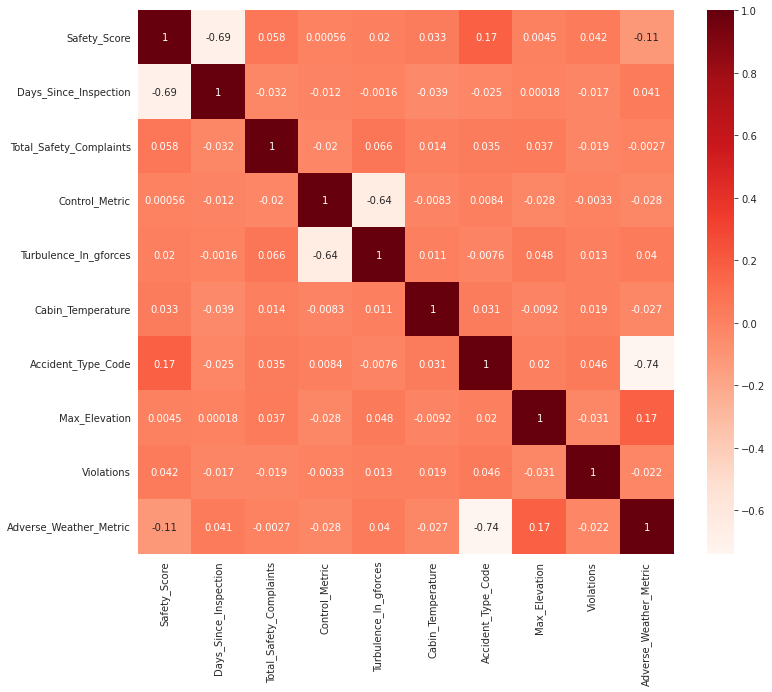

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

observations:
1. most of pari have less correlation less than 0.01
2. (accident_type - saftey_score) has highest postive correlation which is 0.17
3. (Adverse_Weather_Metric - Accident_Type_Code) , (Turbulence_In_gforces - Control_Metric) and  (Safety_Score - Days_Since_Inspection) has highest negative correlation 


#### EDA Conclusion: 


1. we found Safety_Score,Days_Since_Inspection,Accident_Type_Code,Violations these feature will help us a lots 
2. Feel like Adverse_Weather_Metric and Total_Safety_Complaints don't look like a good features and these features has more outliers as right skwed 
3. Highly_Fatal_And_Damaging,Minor_Damage_And_Injuries thses classes can be seprate easily where other two class are overlaping a lot.



## Feature Engineering

feature 1 : Safety_Score * Days_Since_Inspection

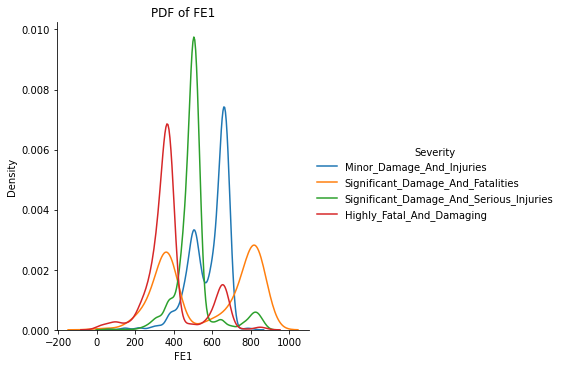

In [ ]:
df['FE1']=df["Safety_Score"]*df["Days_Since_Inspection"]
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE1").add_legend()
plt.title("PDF of FE1")
plt.show()

feature 2 : Safety_Score / Accident_Type_Code

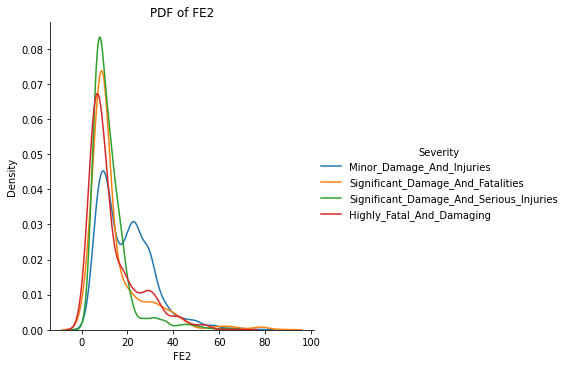

In [ ]:
df['FE2']=(df["Safety_Score"])/(df["Accident_Type_Code"])
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE2").add_legend()
plt.title("PDF of FE2")
plt.show()

feature 3 : log transformation 


blog : log and sqrt transformation 
https://rcompanion.org/handbook/I_12.html#:~:text=For%20right%2Dskewed%20data%E2%80%94tail,log%20(constant%20%E2%80%93%20x).

In [ ]:
df['FE3']= np.log(df["Adverse_Weather_Metric"])

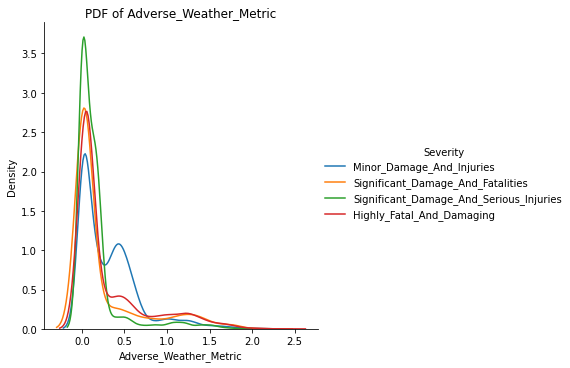

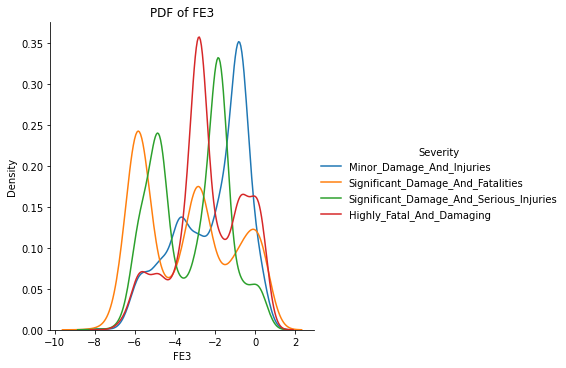

In [ ]:
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Adverse_Weather_Metric").add_legend()
plt.title("PDF of Adverse_Weather_Metric")
plt.show()

I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE3").add_legend()
plt.title("PDF of FE3")
plt.show()

feature 4 : sqrt transformation 

In [ ]:
df['FE4']= np.sqrt(df["Total_Safety_Complaints"])

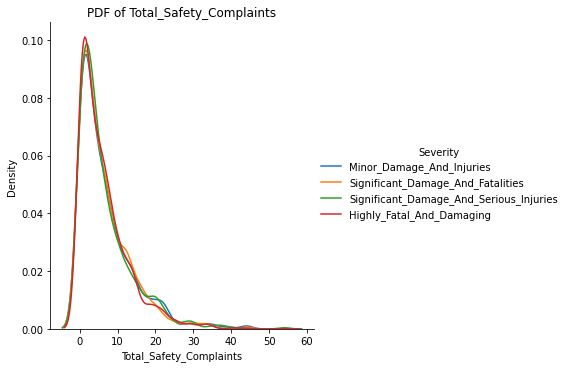

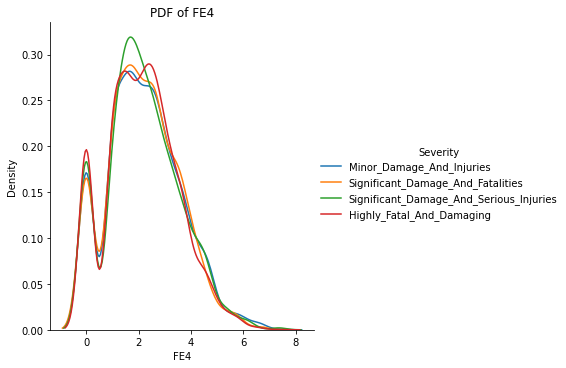

In [ ]:
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "Total_Safety_Complaints").add_legend()
plt.title("PDF of Total_Safety_Complaints")
plt.show()

I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE4").add_legend()
plt.title("PDF of FE4")
plt.show()

Feature 5 log(Max_Elevation/Adverse_Weather_Metric)

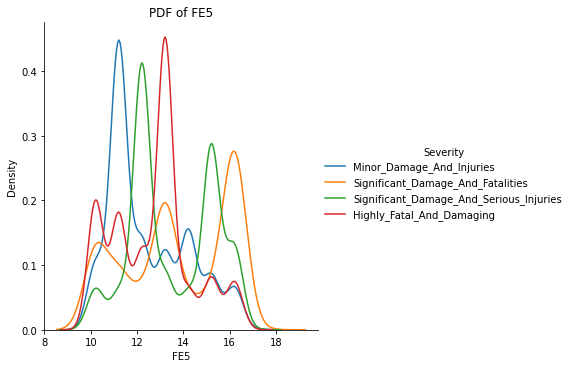

In [ ]:
df['FE5']=np.log(df["Max_Elevation"]/df["Adverse_Weather_Metric"])
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE5").add_legend()
plt.title("PDF of FE5")
plt.show()

feature 6 : Control_Metric + Turbulence_In_gforces

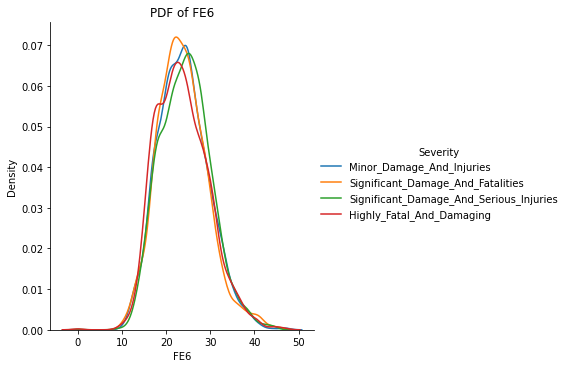

In [ ]:
df['FE6']=(df["Control_Metric"]*df["Turbulence_In_gforces"])
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE6").add_legend()
plt.title("PDF of FE6")
plt.show()

Feature 7 : Adverse_Weather_Metric*Accident_Type_Code

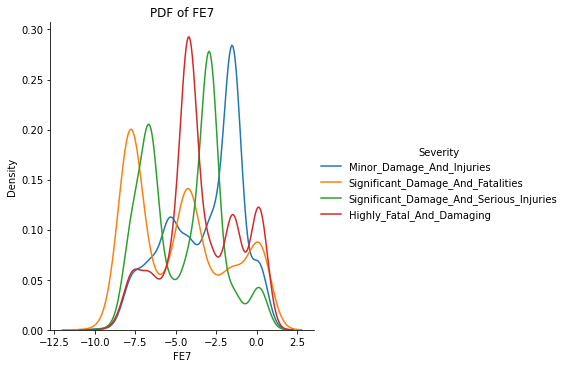

In [ ]:
df['FE7']=np.log(df["Adverse_Weather_Metric"]/(df["Accident_Type_Code"]))
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE7").add_legend()
plt.title("PDF of FE7")
plt.show()

feature 8 : avg of Safety_Score and Control_Metric

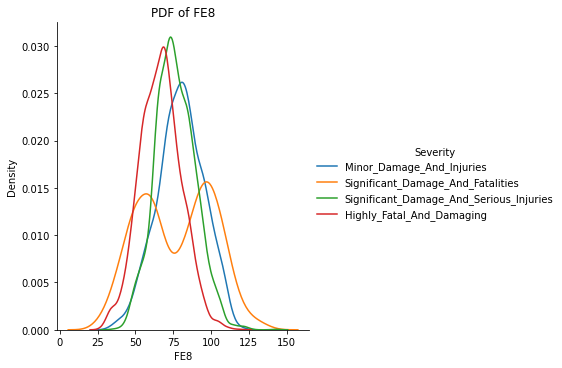

In [ ]:
df['FE8']=(df["Safety_Score"]+(df["Control_Metric"])/2)
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE8").add_legend()
plt.title("PDF of FE8")
plt.show()

feature 9: min of Safety_Score and Control_Metric

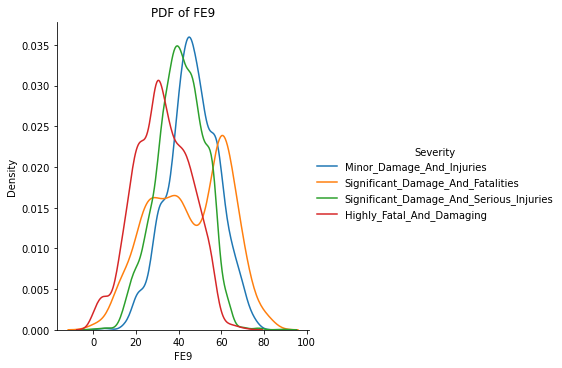

In [ ]:
df['FE9']=df[["Safety_Score", "Control_Metric"]].min(axis=1)
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE9").add_legend()
plt.title("PDF of FE9")
plt.show()

feature 10: max of Safety_Score and Control_Metric

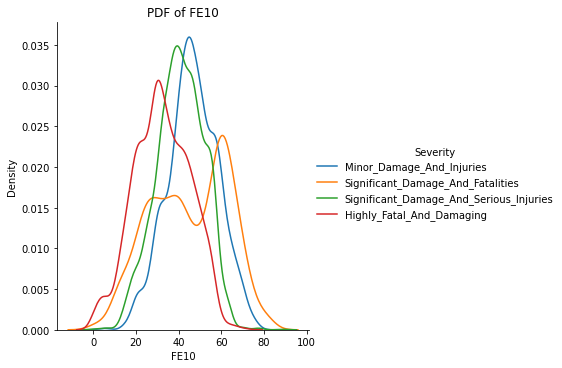

In [ ]:
df['FE10']=df[["Safety_Score", "Control_Metric"]].min(axis=1)
I = sns.FacetGrid(df, hue="Severity", height=5)
I.map(sns.kdeplot, "FE10").add_legend()
plt.title("PDF of FE10")
plt.show()

feature 11 : feature binning Control_Metric

In [ ]:
bins = [-1,30,80,101]
labels = ['low','medium','high']
df['Safety_Score_cat'] = pd.cut(df['Safety_Score'],bins = bins, labels = labels)

feature 12 : numerical to feature Accident_Type_Code


feature 13 : numerical to feature Violations

feature 12 and 13 are in the preprocessing steps

## Data preprocessing

### class lable encoding 

In [ ]:
le=LabelEncoder()
df['Severity'] = le.fit_transform(df['Severity'])

In [ ]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,...,FE2,FE3,FE4,FE5,FE6,FE7,FE8,FE9,FE10,Safety_Score_cat
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,...,24.611872,-0.857192,4.690416,11.209698,19.397988,-1.550339,84.866406,49.223744,49.223744,medium
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,...,31.232877,-1.043130,5.196152,11.209932,30.645705,-1.736278,98.609783,62.465753,62.465753,medium
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,...,9.008480,-5.694652,4.000000,16.272844,21.408934,-7.640562,96.240765,63.059361,63.059361,medium
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,...,16.027397,-1.552452,3.000000,12.216079,25.177342,-2.651064,85.434061,48.082192,48.082192,medium
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,...,8.828006,-1.732265,5.000000,12.209813,25.947109,-2.830877,50.458494,26.484018,26.484018,low


In [ ]:
from sklearn.model_selection import train_test_split
y= df["Severity"]
X=df.drop(["Severity"],axis = 1)
print("shape of X",X.shape)
print("shape of y",y.shape)

shape of X (10000, 21)
shape of y (10000,)


### converting num to Categorical

In [ ]:
! pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 5.3 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=3ccca16a4c6a9e9adfe3d0c9f73bfe6705569ffee15d884fa6c45a267cb480ef
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
from num2words import num2words
a=[]
for i in X.Accident_Type_Code:
    a.append(num2words(i, to = 'ordinal'))
X['Accident_Type_Code_cat'] = pd.DataFrame({'Accident_Type_Code':a})
print(X.Accident_Type_Code_cat.unique())
X.Accident_Type_Code_cat=X.Accident_Type_Code_cat.map(str)
print(X.Accident_Type_Code_cat.value_counts())

['second' 'seventh' 'third' 'fourth' 'first' 'sixth' 'fifth']
fourth     2057
second     1791
third      1752
seventh    1276
sixth      1215
first      1171
fifth       738
Name: Accident_Type_Code_cat, dtype: int64


In [ ]:
from num2words import num2words
a=[]
for i in X.Violations:
    a.append(num2words(i, to = 'ordinal'))
X['Violations_cat'] = pd.DataFrame({'Violations':a})
print(X.Violations_cat.unique())
X.Violations_cat=X.Violations_cat.map(str)
print(X.Violations_cat.value_counts())

['third' 'second' 'first' 'zeroth' 'fourth' 'fifth']
second    3793
first     2398
third     2376
zeroth     696
fourth     675
fifth       62
Name: Violations_cat, dtype: int64


###Test and Train Split (70:30):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("shape of X_train:",X_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_train:",X_test.shape)
print("shape of y_train:",y_test.shape)

shape of X_train: (7000, 23)
shape of y_train: (7000,)
shape of X_train: (3000, 23)
shape of y_train: (3000,)


### Applying StandardScaler for numerical

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train['Safety_Score'].values.reshape(-1, 1))
train_Safety_Score_feature_StandardScaler=scaler1.transform(X_train['Safety_Score'].values.reshape(-1, 1) )
test_Safety_Score_feature_StandardScaler=scaler1.transform(X_test['Safety_Score'].values.reshape(-1, 1) )
print(train_Safety_Score_feature_StandardScaler.shape)
print(test_Safety_Score_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X_train['Days_Since_Inspection'].values.reshape(-1, 1))
train_Days_Since_Inspection_feature_StandardScaler=scaler2.transform(X_train['Days_Since_Inspection'].values.reshape(-1, 1) )
test_Days_Since_Inspection_feature_StandardScaler=scaler2.transform(X_test['Days_Since_Inspection'].values.reshape(-1, 1) )
print(train_Days_Since_Inspection_feature_StandardScaler.shape)
print(test_Days_Since_Inspection_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler()
scaler3.fit(X_train['Total_Safety_Complaints'].values.reshape(-1, 1))
train_Total_Safety_Complaints_feature_StandardScaler=scaler3.transform(X_train['Total_Safety_Complaints'].values.reshape(-1, 1) )
test_Total_Safety_Complaints_feature_StandardScaler=scaler3.transform(X_test['Total_Safety_Complaints'].values.reshape(-1, 1) )
print(train_Total_Safety_Complaints_feature_StandardScaler.shape)
print(test_Total_Safety_Complaints_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler4 = StandardScaler()
scaler4.fit(X_train['Control_Metric'].values.reshape(-1, 1))
train_Control_Metric_feature_StandardScaler=scaler4.transform(X_train['Control_Metric'].values.reshape(-1, 1) )
test_Control_Metric_feature_StandardScaler=scaler4.transform(X_test['Control_Metric'].values.reshape(-1, 1) )
print(train_Control_Metric_feature_StandardScaler.shape)
print(test_Control_Metric_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler5 = StandardScaler()
scaler5.fit(X_train['Turbulence_In_gforces'].values.reshape(-1, 1))
train_Turbulence_In_gforces_feature_StandardScaler=scaler5.transform(X_train['Turbulence_In_gforces'].values.reshape(-1, 1) )
test_Turbulence_In_gforces_feature_StandardScaler=scaler5.transform(X_test['Turbulence_In_gforces'].values.reshape(-1, 1) )
print(train_Turbulence_In_gforces_feature_StandardScaler.shape)
print(test_Turbulence_In_gforces_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler6 = StandardScaler()
scaler6.fit(X_train['Cabin_Temperature'].values.reshape(-1, 1))
train_Cabin_Temperature_feature_StandardScaler=scaler6.transform(X_train['Cabin_Temperature'].values.reshape(-1, 1) )
test_Cabin_Temperature_feature_StandardScaler=scaler6.transform(X_test['Cabin_Temperature'].values.reshape(-1, 1) )
print(train_Cabin_Temperature_feature_StandardScaler.shape)
print(test_Cabin_Temperature_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler7 = StandardScaler()
scaler7.fit(X_train['Max_Elevation'].values.reshape(-1, 1))
train_Max_Elevation_feature_StandardScaler=scaler7.transform(X_train['Max_Elevation'].values.reshape(-1, 1) )
test_Max_Elevation_feature_StandardScaler=scaler7.transform(X_test['Max_Elevation'].values.reshape(-1, 1) )
print(train_Max_Elevation_feature_StandardScaler.shape)
print(test_Max_Elevation_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler8 = StandardScaler()
scaler8.fit(X_train['Adverse_Weather_Metric'].values.reshape(-1, 1))
train_Adverse_Weather_Metric_feature_StandardScaler=scaler8.transform(X_train['Adverse_Weather_Metric'].values.reshape(-1, 1) )
test_Adverse_Weather_Metric_feature_StandardScaler=scaler8.transform(X_test['Adverse_Weather_Metric'].values.reshape(-1, 1) )
print(train_Adverse_Weather_Metric_feature_StandardScaler.shape)
print(test_Adverse_Weather_Metric_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler9 = StandardScaler()
scaler9.fit(X_train['Accident_Type_Code'].values.reshape(-1, 1))
train_Accident_Type_Code_feature_StandardScaler=scaler9.transform(X_train['Accident_Type_Code'].values.reshape(-1, 1) )
test_Accident_Type_Code_feature_StandardScaler=scaler9.transform(X_test['Accident_Type_Code'].values.reshape(-1, 1) )
print(train_Accident_Type_Code_feature_StandardScaler.shape)
print(test_Accident_Type_Code_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler10 = StandardScaler()
scaler10.fit(X_train['Adverse_Weather_Metric'].values.reshape(-1, 1))
train_Violations_feature_StandardScaler=scaler10.transform(X_train['Violations'].values.reshape(-1, 1) )
test_Violations_feature_StandardScaler=scaler10.transform(X_test['Violations'].values.reshape(-1, 1) )
print(train_Violations_feature_StandardScaler.shape)
print(test_Violations_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler11 = StandardScaler()
scaler11.fit(X_train['FE1'].values.reshape(-1, 1))
train_FE1_feature_StandardScaler=scaler11.transform(X_train['FE1'].values.reshape(-1, 1) )
test_FE1_feature_StandardScaler=scaler11.transform(X_test['FE1'].values.reshape(-1, 1) )
print(train_FE1_feature_StandardScaler.shape)
print(test_FE1_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler12 = StandardScaler()
scaler12.fit(X_train['FE2'].values.reshape(-1, 1))
train_FE2_feature_StandardScaler=scaler12.transform(X_train['FE2'].values.reshape(-1, 1) )
test_FE2_feature_StandardScaler=scaler12.transform(X_test['FE2'].values.reshape(-1, 1) )
print(train_FE2_feature_StandardScaler.shape)
print(test_FE2_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler13 = StandardScaler()
scaler13.fit(X_train['FE3'].values.reshape(-1, 1))
train_FE3_feature_StandardScaler=scaler13.transform(X_train['FE3'].values.reshape(-1, 1) )
test_FE3_feature_StandardScaler=scaler13.transform(X_test['FE3'].values.reshape(-1, 1) )
print(train_FE3_feature_StandardScaler.shape)
print(test_FE3_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler14 = StandardScaler()
scaler14.fit(X_train['FE4'].values.reshape(-1, 1))
train_FE4_feature_StandardScaler=scaler14.transform(X_train['FE4'].values.reshape(-1, 1) )
test_FE4_feature_StandardScaler=scaler14.transform(X_test['FE4'].values.reshape(-1, 1) )
print(train_FE4_feature_StandardScaler.shape)
print(test_FE4_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler15 = StandardScaler()
scaler15.fit(X_train['FE5'].values.reshape(-1, 1))
train_FE5_feature_StandardScaler=scaler15.transform(X_train['FE5'].values.reshape(-1, 1) )
test_FE5_feature_StandardScaler=scaler15.transform(X_test['FE5'].values.reshape(-1, 1) )
print(train_FE5_feature_StandardScaler.shape)
print(test_FE5_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler16 = StandardScaler()
scaler16.fit(X_train['FE6'].values.reshape(-1, 1))
train_FE6_feature_StandardScaler=scaler16.transform(X_train['FE6'].values.reshape(-1, 1) )
test_FE6_feature_StandardScaler=scaler16.transform(X_test['FE6'].values.reshape(-1, 1) )
print(train_FE6_feature_StandardScaler.shape)
print(test_FE6_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler17 = StandardScaler()
scaler17.fit(X_train['FE7'].values.reshape(-1, 1))
train_FE7_feature_StandardScaler=scaler17.transform(X_train['FE7'].values.reshape(-1, 1) )
test_FE7_feature_StandardScaler=scaler17.transform(X_test['FE7'].values.reshape(-1, 1) )
print(train_FE7_feature_StandardScaler.shape)
print(test_FE7_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler18 = StandardScaler()
scaler18.fit(X_train['FE8'].values.reshape(-1, 1))
train_FE8_feature_StandardScaler=scaler18.transform(X_train['FE8'].values.reshape(-1, 1) )
test_FE8_feature_StandardScaler=scaler18.transform(X_test['FE8'].values.reshape(-1, 1) )
print(train_FE8_feature_StandardScaler.shape)
print(test_FE8_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler19 = StandardScaler()
scaler19.fit(X_train['FE9'].values.reshape(-1, 1))
train_FE9_feature_StandardScaler=scaler19.transform(X_train['FE9'].values.reshape(-1, 1) )
test_FE9_feature_StandardScaler=scaler19.transform(X_test['FE9'].values.reshape(-1, 1) )
print(train_FE9_feature_StandardScaler.shape)
print(test_FE9_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler20 = StandardScaler()
scaler20.fit(X_train['FE10'].values.reshape(-1, 1))
train_FE10_feature_StandardScaler=scaler20.transform(X_train['FE10'].values.reshape(-1, 1) )
test_FE10_feature_StandardScaler=scaler20.transform(X_test['FE10'].values.reshape(-1, 1) )
print(train_FE10_feature_StandardScaler.shape)
print(test_FE10_feature_StandardScaler.shape)

(7000, 1)
(3000, 1)


### one-hot encoding categorical data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer()
train_Accident_Type_Code_feature_onehotCoding = vectorizer1.fit_transform(X_train['Accident_Type_Code_cat'])
test_Accident_Type_Code_feature_onehotCoding = vectorizer1.transform(X_test['Accident_Type_Code_cat'])
print(train_Accident_Type_Code_feature_onehotCoding.shape)
print(test_Accident_Type_Code_feature_onehotCoding.shape)

(7000, 7)
(3000, 7)


In [ ]:
X_train['Accident_Type_Code_cat']

5646    second
2472     third
987      sixth
2888     sixth
2060    fourth
         ...  
4690     first
2919     third
1930    fourth
9594    fourth
2592     third
Name: Accident_Type_Code_cat, Length: 7000, dtype: object

In [ ]:
train_Accident_Type_Code_feature_onehotCoding

<7000x7 sparse matrix of type '<class 'numpy.int64'>'
	with 7000 stored elements in Compressed Sparse Row format>

In [ ]:
 (vectorizer1.transform(['second','first']))

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
print(test_Accident_Type_Code_feature_onehotCoding.)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
train_Violations_feature_onehotCoding = vectorizer2.fit_transform(X_train['Violations_cat'])
test_Violations_feature_onehotCoding = vectorizer2.transform(X_test['Violations_cat'])
print(train_Violations_feature_onehotCoding.shape)
print(test_Violations_feature_onehotCoding.shape)

(7000, 6)
(3000, 6)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
train_Safety_Score_cat_feature_onehotCoding = vectorizer2.fit_transform(X_train['Safety_Score_cat'])
test_Safety_Score_cat_feature_onehotCoding = vectorizer2.transform(X_test['Safety_Score_cat'])
print(train_Safety_Score_cat_feature_onehotCoding.shape)
print(test_Safety_Score_cat_feature_onehotCoding.shape)

(7000, 3)
(3000, 3)


### stacking data 

In [ ]:
from scipy.sparse import hstack

X_train_pp= hstack((train_Safety_Score_feature_StandardScaler,
                    train_Days_Since_Inspection_feature_StandardScaler,
                    train_Total_Safety_Complaints_feature_StandardScaler,
                    train_Control_Metric_feature_StandardScaler,
                    train_Turbulence_In_gforces_feature_StandardScaler,
                    train_Cabin_Temperature_feature_StandardScaler,
                    train_Max_Elevation_feature_StandardScaler,
                    train_Adverse_Weather_Metric_feature_StandardScaler,
                    train_Accident_Type_Code_feature_StandardScaler,
                    train_Violations_feature_StandardScaler,
                    train_FE1_feature_StandardScaler,
                    train_FE2_feature_StandardScaler,
                    train_FE3_feature_StandardScaler,
                    train_FE4_feature_StandardScaler,
                    train_FE5_feature_StandardScaler,
                    train_FE6_feature_StandardScaler,
                    train_FE7_feature_StandardScaler,
                    train_FE8_feature_StandardScaler,
                    train_FE9_feature_StandardScaler,
                    train_FE10_feature_StandardScaler,
                    train_Accident_Type_Code_feature_onehotCoding,
                    train_Violations_feature_onehotCoding,
                    train_Safety_Score_cat_feature_onehotCoding
                    )).tocsr()
X_test_pp = hstack((test_Safety_Score_feature_StandardScaler,
                    test_Days_Since_Inspection_feature_StandardScaler,
                    test_Total_Safety_Complaints_feature_StandardScaler,
                    test_Control_Metric_feature_StandardScaler,
                    test_Turbulence_In_gforces_feature_StandardScaler,
                    test_Cabin_Temperature_feature_StandardScaler,
                    test_Max_Elevation_feature_StandardScaler,
                    test_Adverse_Weather_Metric_feature_StandardScaler,
                    test_Accident_Type_Code_feature_StandardScaler,
                    test_Violations_feature_StandardScaler,
                    test_FE1_feature_StandardScaler,
                    test_FE2_feature_StandardScaler,
                    test_FE3_feature_StandardScaler,
                    test_FE4_feature_StandardScaler,
                    test_FE5_feature_StandardScaler,
                    test_FE6_feature_StandardScaler,
                    test_FE7_feature_StandardScaler,
                    test_FE8_feature_StandardScaler,
                    test_FE9_feature_StandardScaler,
                    test_FE10_feature_StandardScaler,
                    test_Accident_Type_Code_feature_onehotCoding,
                    test_Violations_feature_onehotCoding,
                    test_Safety_Score_cat_feature_onehotCoding
                      )).tocsr()

print("Final Data matrix")
print(X_train_pp.shape, y_train.shape)
print(X_test_pp.shape,y_test.shape)
print("="*100)

Final Data matrix
(7000, 36) (7000,)
(3000, 36) (3000,)


#### Important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_pp,y_train)

RandomForestClassifier()

In [ ]:
header = ['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric','Accident_Type_Code','Violations','FE1','FE2','FE3','FE4','FE5','FE6','FE7','FE8','FE9','FE10']
for i in range(1,8):
  header.append("Accident_Type_Code_"+str(i))

header

['Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Max_Elevation',
 'Adverse_Weather_Metric',
 'Accident_Type_Code',
 'Violations',
 'FE1',
 'FE2',
 'FE3',
 'FE4',
 'FE5',
 'FE6',
 'FE7',
 'FE8',
 'FE9',
 'FE10',
 'Accident_Type_Code_1',
 'Accident_Type_Code_2',
 'Accident_Type_Code_3',
 'Accident_Type_Code_4',
 'Accident_Type_Code_5',
 'Accident_Type_Code_6',
 'Accident_Type_Code_7']

In [ ]:
import operator
importances = model.feature_importances_
features = dict(zip(header, importances))
sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)
sorted_features

[('FE1', 0.26530467171052063),
 ('Control_Metric', 0.15652313268107496),
 ('Days_Since_Inspection', 0.07326915157366469),
 ('Safety_Score', 0.05569825602490337),
 ('FE8', 0.05093572335387651),
 ('FE10', 0.049667016691478195),
 ('FE9', 0.0470837934097891),
 ('Turbulence_In_gforces', 0.03483850050070113),
 ('FE5', 0.031038350858261524),
 ('FE2', 0.030505454521039983),
 ('FE7', 0.02485302368170017),
 ('Adverse_Weather_Metric', 0.020498685385019644),
 ('FE3', 0.01986682945437444),
 ('FE6', 0.017958831123633105),
 ('Accident_Type_Code', 0.0142465304698986),
 ('Cabin_Temperature', 0.013514462462969376),
 ('Accident_Type_Code_3', 0.011186724714475023),
 ('Max_Elevation', 0.01086308943567474),
 ('Accident_Type_Code_7', 0.00964587361343237),
 ('FE4', 0.009281382733978695),
 ('Total_Safety_Complaints', 0.009055668988603714),
 ('Accident_Type_Code_4', 0.008724198354258228),
 ('Safety_Score_cat1', 0.004933859857125023),
 ('Accident_Type_Code_5', 0.004738778012187815),
 ('Violations', 0.00463416492

Observation:
1. we found that our new featuters are working well, some of our feature engineering techniquesn worked well
2. Safety_Score_cat1 ,Violations_2 are not that good,removing those features

#### removing features

In [ ]:
from scipy.sparse import hstack

X_train_pp= hstack((train_Safety_Score_feature_StandardScaler,
                    train_Days_Since_Inspection_feature_StandardScaler,
                    train_Total_Safety_Complaints_feature_StandardScaler,
                    train_Control_Metric_feature_StandardScaler,
                    train_Turbulence_In_gforces_feature_StandardScaler,
                    train_Cabin_Temperature_feature_StandardScaler,
                    train_Max_Elevation_feature_StandardScaler,
                    train_Adverse_Weather_Metric_feature_StandardScaler,
                    train_Accident_Type_Code_feature_StandardScaler,
                    train_Violations_feature_StandardScaler,
                    train_FE1_feature_StandardScaler,
                    train_FE2_feature_StandardScaler,
                    train_FE3_feature_StandardScaler,
                    train_FE4_feature_StandardScaler,
                    train_FE5_feature_StandardScaler,
                    train_FE6_feature_StandardScaler,
                    train_FE7_feature_StandardScaler,
                    train_FE8_feature_StandardScaler,
                    train_FE9_feature_StandardScaler,
                    train_FE10_feature_StandardScaler,
                    train_Accident_Type_Code_feature_onehotCoding
                    )).tocsr()
X_test_pp = hstack((test_Safety_Score_feature_StandardScaler,
                    test_Days_Since_Inspection_feature_StandardScaler,
                    test_Total_Safety_Complaints_feature_StandardScaler,
                    test_Control_Metric_feature_StandardScaler,
                    test_Turbulence_In_gforces_feature_StandardScaler,
                    test_Cabin_Temperature_feature_StandardScaler,
                    test_Max_Elevation_feature_StandardScaler,
                    test_Adverse_Weather_Metric_feature_StandardScaler,
                    test_Accident_Type_Code_feature_StandardScaler,
                    test_Violations_feature_StandardScaler,
                    test_FE1_feature_StandardScaler,
                    test_FE2_feature_StandardScaler,
                    test_FE3_feature_StandardScaler,
                    test_FE4_feature_StandardScaler,
                    test_FE5_feature_StandardScaler,
                    test_FE6_feature_StandardScaler,
                    test_FE7_feature_StandardScaler,
                    test_FE8_feature_StandardScaler,
                    test_FE9_feature_StandardScaler,
                    test_FE10_feature_StandardScaler,
                    test_Accident_Type_Code_feature_onehotCoding
                      )).tocsr()

print("Final Data matrix")
print(X_train_pp.shape, y_train.shape)
print(X_test_pp.shape,y_test.shape)
print("="*100)

Final Data matrix
(7000, 27) (7000,)
(3000, 27) (3000,)


## Modeling

In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d", cmap='YlGnBu') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### KNN

In [ ]:
parameters = { 'n_neighbors' : [3,4,5,6,7,8,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parameters, cv=5, scoring='accuracy', n_jobs = -1)
grid .fit(X_train_pp, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7677142857142857
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', weights='distance')


In [ ]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
knn.fit(X_train_pp, y_train)
y_predict_train = knn.predict(X_train_pp)
y_predict_test =  knn.predict(X_test_pp)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  1.0
Train f1_score:  1.0
Test accuracy_score:  0.772
Test f1_score:  0.7716948229384977


train confusion_matrix 


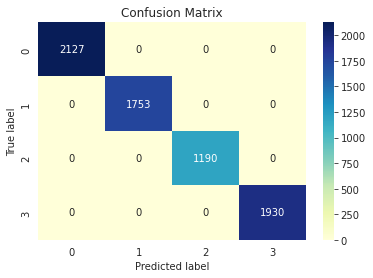

test confusion_matrix 


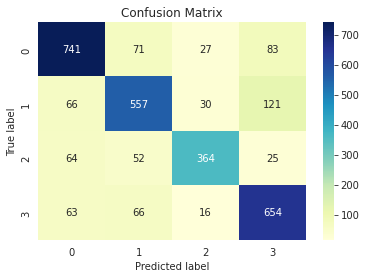

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lr = LogisticRegression()
grid = GridSearchCV(lr, parameters, cv=5, scoring='accuracy', n_jobs = -1)
grid .fit(X_train_pp, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6445714285714286
{'C': 10.0, 'penalty': 'l2'}
LogisticRegression(C=10.0)


In [ ]:
lr=LogisticRegression(C=100,penalty= 'l2')
lr.fit(X_train_pp, y_train)
y_predict_train = lr.predict(X_train_pp)
y_predict_test =  lr.predict(X_test_pp)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("TraTestin f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  0.6452857142857142
Train f1_score:  0.6418963198826776
Test accuracy_score:  0.6283333333333333
TraTestin f1_score:  0.625182232265822


train confusion_matrix 


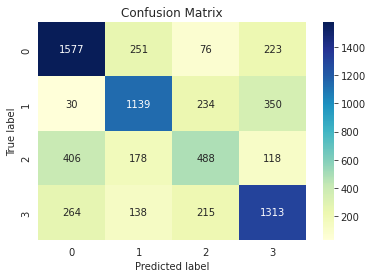

test confusion_matrix 


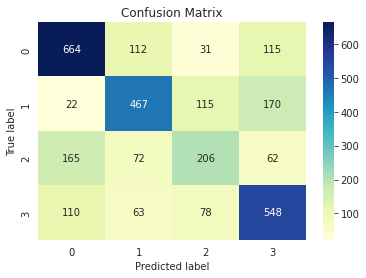

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

### SVM

In [ ]:
parameters = {"kernel" :['rbf','poly','sigmoid','linear'],
              "C" : np.logspace(-3,3,7)}
svm = SVC()
grid = GridSearchCV(svm, parameters, cv=5, scoring='accuracy', n_jobs = -1)
grid .fit(X_train_pp, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8958571428571428
{'C': 10.0, 'kernel': 'rbf'}
SVC(C=10.0)


In [ ]:
svm= SVC(C = 10, kernel = 'rbf')
svm.fit(X_train_pp, y_train)
y_predict_train = svm.predict(X_train_pp)
y_predict_test =  svm.predict(X_test_pp)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  0.9404285714285714
Train f1_score:  0.9403725918119433
Test accuracy_score:  0.9106666666666666
Test f1_score:  0.9106102977064271


train confusion_matrix 


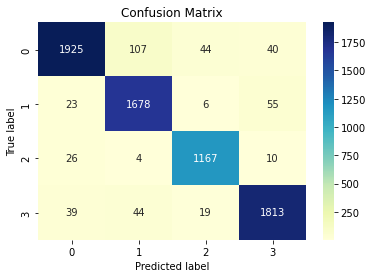

test confusion_matrix 


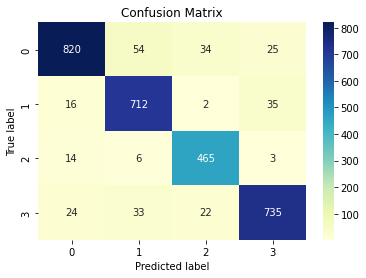

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': [2, 3, 5, 10, 15 ,20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
                'criterion': ["gini", "entropy"]}
DT = DecisionTreeClassifier()
grid = GridSearchCV(DT, parameters, cv=5, scoring='accuracy', n_jobs = -1)
grid .fit(X_train_pp, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9417142857142856
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
dt.fit(X_train_pp, y_train)
y_predict_train = dt.predict(X_train_pp)
y_predict_test =  dt.predict(X_test_pp)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  0.9421428571428572
Train f1_score:  0.9421194300868558
Test accuracy_score:  0.9353333333333333
Test f1_score:  0.9352783121983397


train confusion_matrix 


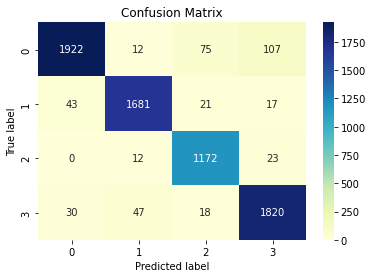

test confusion_matrix 


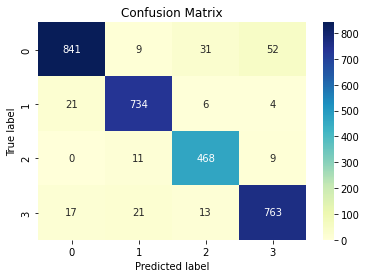

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

### Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [100,500,750,1000,1250,1500] 
parameters = {'n_estimators': n_estimators,'max_depth':[6,7,8,9,10],'max_features':["auto", "sqrt", "log2" ,"None"]}
RF = RandomForestClassifier(n_jobs = -1)
grid = GridSearchCV(RF, parameters, cv=5, scoring='accuracy', n_jobs = -1)
grid .fit(X_train_pp, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9445714285714286
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1000,
                       n_jobs=-1)


In [ ]:
RF= RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1000,n_jobs=-1)
RF.fit(X_train_pp, y_train)
y_predict_train = RF.predict(X_train_pp)
y_predict_test =  RF.predict(X_test_pp)

print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  0.9857142857142858
Train f1_score:  0.9857127472950734
Test accuracy_score:  0.9463333333333334
Test f1_score:  0.9463447253361623


train confusion_matrix 


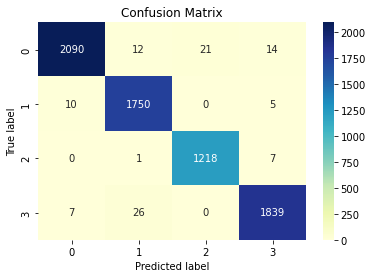

test confusion_matrix 


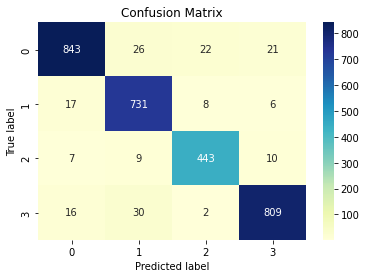

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

### XgBoost 

In [ ]:
from xgboost import XGBClassifier
n_estimators = [100,500,750,1000]
parameters = {'n_estimators': n_estimators,
              'booster':["gbtree","gblinear","dart"],
              'eta':[0.25,0.5,0.75]}
XGBT = XGBClassifier(nthread=-1)
grid = GridSearchCV(XGBT, parameters, cv=5, scoring='accuracy', n_jobs = -1)
grid .fit(X_train_pp, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9565714285714286
{'eta': 0.25, 'n_estimators': 1000}
XGBClassifier(eta=0.25, n_estimators=1000, nthread=-1,
              objective='multi:softprob')


In [ ]:
from xgboost import XGBClassifier
XGBT= XGBClassifier(eta=0.25, n_estimators=1000, nthread=-1,booster='gbtree')
XGBT.fit(X_train_pp, y_train)
y_predict_train = XGBT.predict(X_train_pp)
y_predict_test =  XGBT.predict(X_test_pp)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  1.0
Train f1_score:  1.0
Test accuracy_score:  0.9613333333333334
Test f1_score:  0.9613115935556532


train confusion_matrix 


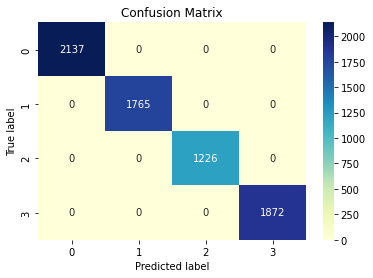

test confusion_matrix 


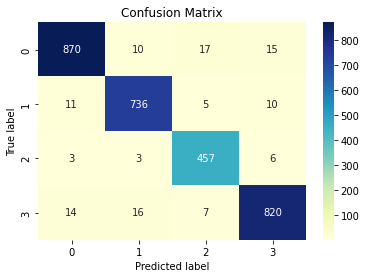

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

In [ ]:
from tabulate import tabulate
 

mydata = [
    ["knn","1.0","0.77"],
    ["LR"," 0.64","0.62"],
    ["SVM"," 0.96"," 0.93"],
      ["DT","0.96","0.94"],
      ["RF","0.98","0.94"],
      ["XGBT","1","0.96"]
]
 
head = ["MODEL", "TRAIN F1","TEST F1"]
 
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------+------------+-----------+
| MODEL   |   TRAIN F1 |   TEST F1 |
+=========+============+===========+
| knn     |       1    |      0.77 |
+---------+------------+-----------+
| LR      |       0.64 |      0.62 |
+---------+------------+-----------+
| SVM     |       0.96 |      0.93 |
+---------+------------+-----------+
| DT      |       0.96 |      0.94 |
+---------+------------+-----------+
| RF      |       0.98 |      0.94 |
+---------+------------+-----------+
| XGBT    |       1    |      0.96 |
+---------+------------+-----------+


observation:


1. KNN : is highly overfitting 
2. LR : peformance is bad
3. SVM,RT,XGBT are overfitting but the performance is good 
4. DT is not overfitting with 0.94 f1 score
5. DT,xgboot are top performers


### saving important models

In [ ]:
XGBT.save_model('XGBT.json')

In [ ]:
import pickle
file_name = "XGBT.pkl"
pickle.dump(XGBT, open(file_name, "wb"))

In [ ]:
for i in range(1,21):
  a = "/content/drive/MyDrive/case study 1/model/scaler"
  b=".joblib"
  filename = a+str(i)+b
  data = "scaler"+str(i)
  joblib.dump(globals()[data], filename) 

In [ ]:
import xgboost
print(xgboost.__version__)

0.90


In [ ]:
pickle.dump(XGBT, open("pima.pickle.dat", "wb"))

In [ ]:
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
y_pred = loaded_model.predict(X_test_pp)

In [ ]:
filename = "/content/drive/MyDrive/case study 1/model/le.joblib"
joblib.dump(le, filename)

['/content/drive/MyDrive/case study 1/model/le.joblib']

### Model interpretability
ref : https://www.kaggle.com/code/dansbecker/shap-values

In [ ]:
! pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import shap  
explainer = shap.TreeExplainer(XGBT)
shap_values = explainer.shap_values(X_test_pp[5])

In [ ]:
print("predicted class:",y_predict_test[5])
shap.initjs()
shap.force_plot(explainer.expected_value[y_predict_test[5]], shap_values[y_predict_test[5]])

predicted class: 2


these five top feature help to predict class as **Highly_Fatal_And_Damaging**

In [ ]:
list1, list2 = zip(*sorted(zip(shap_values[0][0], header)))
top5=list(list2[-5:])[::-1]
print(top5)

['Total_Safety_Complaints', 'Cabin_Temperature', 'FE5', 'Turbulence_In_gforces', 'FE2']


### class Distribution in TRAIN data

Class=2, n=1226 (17.514%)
Class=3, n=1872 (26.743%)
Class=1, n=1765 (25.214%)
Class=0, n=2137 (30.529%)


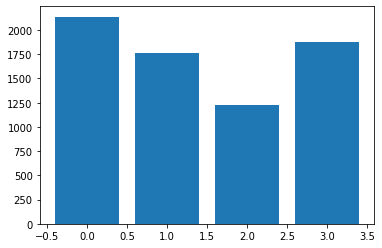

In [ ]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Upsampling

[Ref](https://machinelearningmastery.com/multi-class-imbalanced-classification/)

In [ ]:
strategy = {0:2144, 1:2000, 2:2000 , 3:2000 }
oversample = SMOTE(sampling_strategy=strategy)
X_train_pp_1, y_train_1 = oversample.fit_resample(X_train_pp, y_train)

Class=2, n=2000 (24.558%)
Class=3, n=2000 (24.558%)
Class=1, n=2000 (24.558%)
Class=0, n=2144 (26.326%)


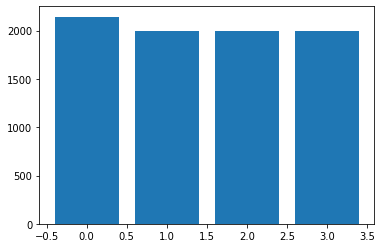

In [ ]:
counter = Counter(y_train_1)
for k,v in counter.items():
	per = v / len(y_train_1) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
XGBT= XGBClassifier(eta=0.25, n_estimators=2000, nthread=-1,booster='gbtree')
XGBT.fit(X_train_pp_1, y_train_1)
y_predict_train = XGBT.predict(X_train_pp_1)
y_predict_test =  XGBT.predict(X_test_pp)
print("Train accuracy_score: " ,accuracy_score(y_train_1, y_predict_train))
print("Train f1_score: " ,f1_score(y_train_1, y_predict_train, average='weighted'))
print("Train accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Train f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))

Train accuracy_score:  1.0
Train f1_score:  1.0
Train accuracy_score:  0.958
Train f1_score:  0.9580383152358701


train confusion_matrix 


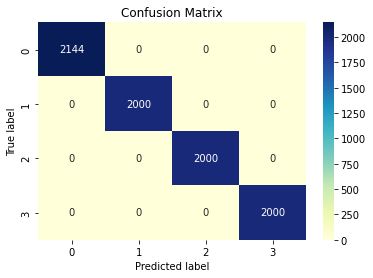

test confusion_matrix 


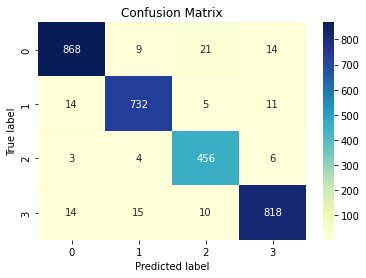

In [ ]:
print("train confusion_matrix ")
cm_logreg = confusion_matrix(y_train_1,y_predict_train)
draw_confusion_matrix(cm_logreg)
print("test confusion_matrix ")
cm_logreg = confusion_matrix(y_test,y_predict_test)
draw_confusion_matrix(cm_logreg)

observation : there is only slight change in performance after upsamling

#score checking --hacker rank

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/case study 1/data/test.csv')

df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [ ]:
df_test['FE1']=df_test["Safety_Score"]*df_test["Days_Since_Inspection"]
df_test['FE2']=df_test["Safety_Score"]/df_test["Accident_Type_Code"]
df_test['FE3']= np.log(df_test["Adverse_Weather_Metric"])
df_test['FE4']= np.sqrt(df_test["Total_Safety_Complaints"])
df_test['FE5']=np.log(df_test["Max_Elevation"]/df_test["Adverse_Weather_Metric"])
df_test['FE6']=(df_test["Control_Metric"]*df_test["Turbulence_In_gforces"])
df_test['FE7']=np.log(df_test["Adverse_Weather_Metric"]/(df_test["Accident_Type_Code"]))
df_test['FE8']=(df_test["Safety_Score"]+(df_test["Control_Metric"])/2)
df_test['FE9']=df_test[["Safety_Score", "Control_Metric"]].min(axis=1)
df_test['FE10']=df_test[["Safety_Score", "Control_Metric"]].min(axis=1)

In [ ]:
X1=df_test.drop(["Accident_ID"],axis = 1)
X1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,FE1,FE2,FE3,FE4,FE5,FE6,FE7,FE8,FE9,FE10
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,311.963470,4.874429,-2.663663,2.449490,13.207681,28.063872,-4.049958,55.573378,19.497717,19.497717
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,872.602740,8.310502,-5.886240,1.732051,16.201665,16.200622,-7.832150,90.466132,58.173516,58.173516
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,499.315068,5.547945,-5.445335,1.732051,15.219449,21.789854,-7.237094,65.648656,33.287671,33.287671
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,69.041096,1.095890,-1.609486,2.236068,12.211336,27.990171,-2.708098,36.469075,3.287671,3.287671
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,195.616438,5.433790,-0.726299,1.414214,11.203461,17.574476,-1.419446,38.921363,10.867580,10.867580


In [ ]:
from num2words import num2words
a=[]
for i in X1.Accident_Type_Code:
    a.append(num2words(i, to = 'ordinal'))
X1['Accident_Type_Code_cat'] = pd.DataFrame({'Accident_Type_Code':a})

In [ ]:
train_Safety_Score_feature_StandardScaler= scaler1.transform(X1['Safety_Score'].values.reshape(-1, 1) )
train_Days_Since_Inspection_feature_StandardScaler=scaler2.transform(X1['Days_Since_Inspection'].values.reshape(-1, 1) )
train_Total_Safety_Complaints_feature_StandardScaler=scaler3.transform(X1['Total_Safety_Complaints'].values.reshape(-1, 1) )
train_Control_Metric_feature_StandardScaler=scaler4.transform(X1['Control_Metric'].values.reshape(-1, 1) )
train_Turbulence_In_gforces_feature_StandardScaler=scaler5.transform(X1['Turbulence_In_gforces'].values.reshape(-1, 1) )
train_Cabin_Temperature_feature_StandardScaler=scaler6.transform(X1['Cabin_Temperature'].values.reshape(-1, 1) )
train_Max_Elevation_feature_StandardScaler=scaler7.transform(X1['Max_Elevation'].values.reshape(-1, 1) )
train_Adverse_Weather_Metric_feature_StandardScaler=scaler8.transform(X1['Adverse_Weather_Metric'].values.reshape(-1, 1) )
train_Accident_Type_Code_feature_StandardScaler=scaler9.transform(X1['Accident_Type_Code'].values.reshape(-1, 1) )
train_Violations_feature_StandardScaler=scaler10.transform(X1['Violations'].values.reshape(-1, 1) )
train_FE1_feature_StandardScaler=scaler11.transform(X1['FE1'].values.reshape(-1, 1) )
train_FE2_feature_StandardScaler=scaler12.transform(X1['FE2'].values.reshape(-1, 1) )
train_FE3_feature_StandardScaler=scaler13.transform(X1['FE3'].values.reshape(-1, 1) )
train_FE4_feature_StandardScaler=scaler14.transform(X1['FE4'].values.reshape(-1, 1) )
train_FE5_feature_StandardScaler=scaler15.transform(X1['FE5'].values.reshape(-1, 1) )
train_FE6_feature_StandardScaler=scaler16.transform(X1['FE6'].values.reshape(-1, 1) )
train_FE7_feature_StandardScaler=scaler17.transform(X1['FE7'].values.reshape(-1, 1) )
train_FE8_feature_StandardScaler=scaler18.transform(X1['FE8'].values.reshape(-1, 1) )
train_FE9_feature_StandardScaler=scaler19.transform(X1['FE9'].values.reshape(-1, 1) )
train_FE10_feature_StandardScaler=scaler20.transform(X1['FE10'].values.reshape(-1, 1) )
train_Accident_Type_Code_feature_onehotCoding = vectorizer1.fit_transform(X1['Accident_Type_Code_cat'])

In [ ]:
from scipy.sparse import hstack
X_train_pp1 = hstack((train_Safety_Score_feature_StandardScaler,
                    train_Days_Since_Inspection_feature_StandardScaler,
                    train_Total_Safety_Complaints_feature_StandardScaler,
                    train_Control_Metric_feature_StandardScaler,
                    train_Turbulence_In_gforces_feature_StandardScaler,
                    train_Cabin_Temperature_feature_StandardScaler,
                    train_Max_Elevation_feature_StandardScaler,
                    train_Adverse_Weather_Metric_feature_StandardScaler,
                    train_Accident_Type_Code_feature_StandardScaler,
                    train_Violations_feature_StandardScaler,
                    train_FE1_feature_StandardScaler,
                    train_FE2_feature_StandardScaler,
                    train_FE3_feature_StandardScaler,
                    train_FE4_feature_StandardScaler,
                    train_FE5_feature_StandardScaler,
                    train_FE6_feature_StandardScaler,
                    train_FE7_feature_StandardScaler,
                    train_FE8_feature_StandardScaler,
                    train_FE9_feature_StandardScaler,
                    train_FE10_feature_StandardScaler,
                    train_Accident_Type_Code_feature_onehotCoding,
                    )).tocsr()

In [ ]:
y_predict_train = XGBT.predict(X_train_pp1)

In [ ]:
final = pd.DataFrame()

In [ ]:
final["Accident_ID"] = df_test["Accident_ID"]
final['Severity'] = le.inverse_transform(y_predict_train)

In [ ]:
final

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities
...,...,...
2495,12484,Highly_Fatal_And_Damaging
2496,12487,Significant_Damage_And_Serious_Injuries
2497,12488,Significant_Damage_And_Serious_Injuries
2498,12491,Significant_Damage_And_Serious_Injuries


In [ ]:
final.to_csv('final.csv',index=False)

my score in hacker earth : 85.32502

top score is : 87.42502

# final 

In [ ]:
import pandas as pd
df_test = pd.read_csv('/content/drive/MyDrive/case study 1/data/test.csv')

df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 4.0 MB/s 


In [ ]:
from num2words import num2words
from scipy.sparse import hstack
import os
import glob
import joblib
import numpy as np
from sklearn.metrics import f1_score

In [ ]:
def final_fun_1(df_test):

  #loading models  

  arr = os.listdir("/content/drive/MyDrive/case study 1/model")

  path=glob.glob("/content/drive/MyDrive/case study 1/model/*")
  lst=[]
  for i in range(len(arr)):
    arr1 = (arr[i].replace(".joblib",""))
    lst.append(arr1)

  
  for i in  range(len(lst)):
    a=lst[i]
    b=joblib.load(path[i])
    globals()[a]=b



  # feature enigneerring methods
  df_test['FE1']=df_test["Safety_Score"]*df_test["Days_Since_Inspection"]
  df_test['FE2']=df_test["Safety_Score"]/df_test["Accident_Type_Code"]
  df_test['FE3']= np.log(df_test["Adverse_Weather_Metric"])
  df_test['FE4']= np.sqrt(df_test["Total_Safety_Complaints"])
  df_test['FE5']=np.log(df_test["Max_Elevation"]/df_test["Adverse_Weather_Metric"])
  df_test['FE6']=(df_test["Control_Metric"]*df_test["Turbulence_In_gforces"])
  df_test['FE7']=np.log(df_test["Adverse_Weather_Metric"]/(df_test["Accident_Type_Code"]))
  df_test['FE8']=(df_test["Safety_Score"]+(df_test["Control_Metric"])/2)
  df_test['FE9']=df_test[["Safety_Score", "Control_Metric"]].min(axis=1)
  df_test['FE10']=df_test[["Safety_Score", "Control_Metric"]].min(axis=1)


  # removing id column
  if 'Accident_ID' in df_test.columns:
    X1=df_test.drop(["Accident_ID"],axis = 1)
  else:
    X1=df_test


  # converting numerical data to cat data  
  a=[]
  for i in X1.Accident_Type_Code:
      a.append(num2words(i, to = 'ordinal'))
  X1['Accident_Type_Code_cat'] = pd.DataFrame({'Accident_Type_Code':a})


  # data pre-processing

  train_Safety_Score_feature_StandardScaler= scaler1.transform(X1['Safety_Score'].values.reshape(-1, 1) )
  train_Days_Since_Inspection_feature_StandardScaler=scaler2.transform(X1['Days_Since_Inspection'].values.reshape(-1, 1) )
  train_Total_Safety_Complaints_feature_StandardScaler=scaler3.transform(X1['Total_Safety_Complaints'].values.reshape(-1, 1) )
  train_Control_Metric_feature_StandardScaler=scaler4.transform(X1['Control_Metric'].values.reshape(-1, 1) )
  train_Turbulence_In_gforces_feature_StandardScaler=scaler5.transform(X1['Turbulence_In_gforces'].values.reshape(-1, 1) )
  train_Cabin_Temperature_feature_StandardScaler=scaler6.transform(X1['Cabin_Temperature'].values.reshape(-1, 1) )
  train_Max_Elevation_feature_StandardScaler=scaler7.transform(X1['Max_Elevation'].values.reshape(-1, 1) )
  train_Adverse_Weather_Metric_feature_StandardScaler=scaler8.transform(X1['Adverse_Weather_Metric'].values.reshape(-1, 1) )
  train_Accident_Type_Code_feature_StandardScaler=scaler9.transform(X1['Accident_Type_Code'].values.reshape(-1, 1) )
  train_Violations_feature_StandardScaler=scaler10.transform(X1['Violations'].values.reshape(-1, 1) )
  train_FE1_feature_StandardScaler=scaler11.transform(X1['FE1'].values.reshape(-1, 1) )
  train_FE2_feature_StandardScaler=scaler12.transform(X1['FE2'].values.reshape(-1, 1) )
  train_FE3_feature_StandardScaler=scaler13.transform(X1['FE3'].values.reshape(-1, 1) )
  train_FE4_feature_StandardScaler=scaler14.transform(X1['FE4'].values.reshape(-1, 1) )
  train_FE5_feature_StandardScaler=scaler15.transform(X1['FE5'].values.reshape(-1, 1) )
  train_FE6_feature_StandardScaler=scaler16.transform(X1['FE6'].values.reshape(-1, 1) )
  train_FE7_feature_StandardScaler=scaler17.transform(X1['FE7'].values.reshape(-1, 1) )
  train_FE8_feature_StandardScaler=scaler18.transform(X1['FE8'].values.reshape(-1, 1) )
  train_FE9_feature_StandardScaler=scaler19.transform(X1['FE9'].values.reshape(-1, 1) )
  train_FE10_feature_StandardScaler=scaler20.transform(X1['FE10'].values.reshape(-1, 1) )
  train_Accident_Type_Code_feature_onehotCoding = vectorizer1.fit_transform(X1['Accident_Type_Code_cat'])

  #data stacking 

  X_train_pp1 = hstack((train_Safety_Score_feature_StandardScaler,
                    train_Days_Since_Inspection_feature_StandardScaler,
                    train_Total_Safety_Complaints_feature_StandardScaler,
                    train_Control_Metric_feature_StandardScaler,
                    train_Turbulence_In_gforces_feature_StandardScaler,
                    train_Cabin_Temperature_feature_StandardScaler,
                    train_Max_Elevation_feature_StandardScaler,
                    train_Adverse_Weather_Metric_feature_StandardScaler,
                    train_Accident_Type_Code_feature_StandardScaler,
                    train_Violations_feature_StandardScaler,
                    train_FE1_feature_StandardScaler,
                    train_FE2_feature_StandardScaler,
                    train_FE3_feature_StandardScaler,
                    train_FE4_feature_StandardScaler,
                    train_FE5_feature_StandardScaler,
                    train_FE6_feature_StandardScaler,
                    train_FE7_feature_StandardScaler,
                    train_FE8_feature_StandardScaler,
                    train_FE9_feature_StandardScaler,
                    train_FE10_feature_StandardScaler,
                    train_Accident_Type_Code_feature_onehotCoding,
                    )).tocsr()
  
  #model prediction 
  y_predict_train = XGBT.predict(X_train_pp1)



  
  output=le.inverse_transform(y_predict_train)

  return output

In [ ]:
def final_fun_2(X,y):
  y_predict=final_fun_1(X)

  le=joblib.load("/content/drive/MyDrive/case study 1/model/le.joblib")

  y1=le.transform(y_predict)

  y2 = le.transform(y)

  score=f1_score(y1, y2, average='weighted')

  return score

  


In [ ]:
output = final_fun_1(df_test)

In [ ]:
print(output)

['Highly_Fatal_And_Damaging' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' ...
 'Significant_Damage_And_Serious_Injuries'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/case study 1/data/train.csv')
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [ ]:
from sklearn.model_selection import train_test_split
y= df["Severity"]
X=df.drop(["Severity"],axis = 1)
print("shape of X",X.shape)
print("shape of y",y.shape)

shape of X (10000, 11)
shape of y (10000,)


In [ ]:
final_fun_2(X,y)

0.9848988261289742